In [1]:
import pandas as pd # Import pandas
import numpy as np  # liner algebra
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import nltk
import nltk as nlp
import string # Import string for list of punctuation
import re
import time
import itertools
from nltk.corpus import stopwords # Import the stop word list
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

# Reading the data

In [2]:
Truenews = pd.read_csv("C:/Users/bhavani/Desktop/Dataset/True.csv")

In [3]:
Fakenews = pd.read_csv("C:/Users/bhavani/Desktop/Dataset/Fake.csv")

In [4]:
Truenews.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
Fakenews.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


# Data Analysis

In [6]:
Truenews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
title      21417 non-null object
text       21417 non-null object
subject    21417 non-null object
date       21417 non-null object
dtypes: object(4)
memory usage: 669.4+ KB


In [7]:
Fakenews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
title      23481 non-null object
text       23481 non-null object
subject    23481 non-null object
date       23481 non-null object
dtypes: object(4)
memory usage: 733.9+ KB


In [8]:
#Checking the total NA values for each column and precent
Truenews.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [9]:
Fakenews.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [10]:
# Describe True news
Truenews.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [11]:
# Describe Fake news
Fakenews.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


# Looking into the real data has location and publisher information which is not in fake
# To make it consistency, removing location and publisher information in real.

In [12]:
Truenews["text"] = Truenews["text"].apply(lambda x: x.partition("-")[2])

In [13]:
Truenews.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fi...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links be...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos to...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Pos...,politicsNews,"December 29, 2017"


In [14]:
# Counting by Subjects
Truenews.subject.value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [15]:
Fakenews.subject.value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [16]:
# Creating a target column named 'category' in both data and concatneating them.
Truenews['category'] = 'True'
Fakenews['category'] = 'Fake'
combined_data = pd.concat([Truenews, Fakenews])

In [17]:
print(combined_data.shape)
combined_data.head()

(44898, 5)


,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fi...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links be...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos to...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Pos...,politicsNews,"December 29, 2017",True


# Data Visualization 

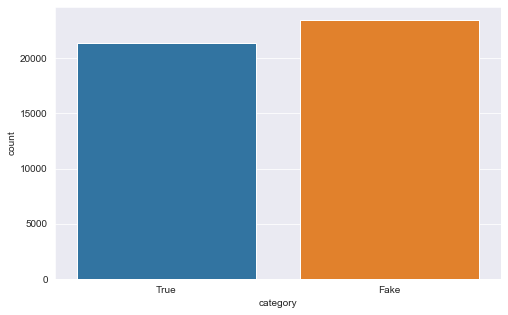

In [18]:
# plots to see whether data is balanced. Using seaborn library to plot 
#counts of true and fake.
plt.figure(figsize = (8,5))
sns.set_style("darkgrid")
sns.countplot(combined_data['category'])
# Looking below the count plots showing that data are balanced

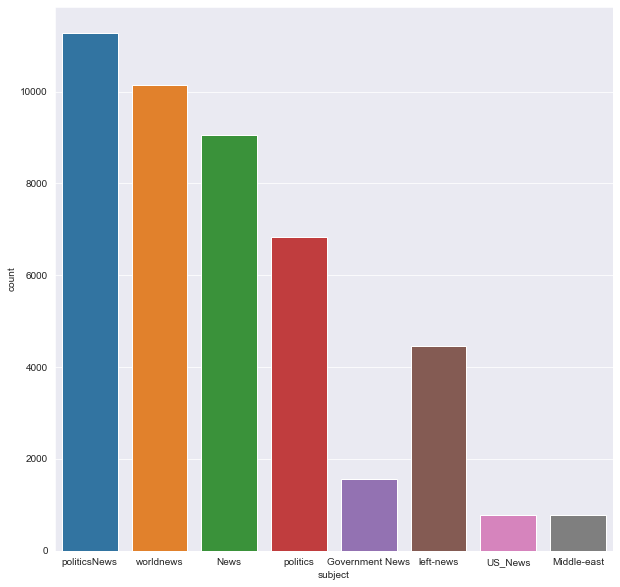

In [19]:
# Now examine the subjects
# The countplot is showing the largerest number of news from politicalNews.
combined_data['subject'].value_counts()
plt.figure(figsize = (10,10))
sns.set_style("darkgrid")
sns.countplot(combined_data['subject']);

[Text(0, 0, 'True'), Text(0, 0, 'Fake')]

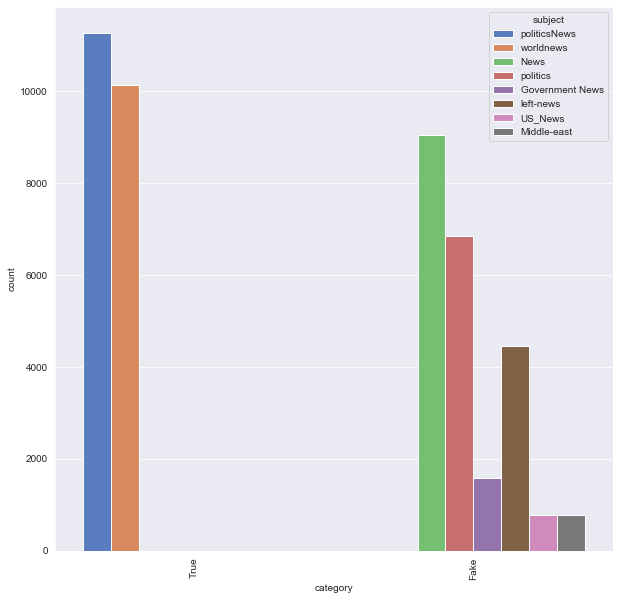

In [20]:
# Lets go in detail
# Looking at plot, it is clearly shows that True news belongs to two subjects.
plt.figure(figsize = (10,10))
sns.set_style("darkgrid")
chart = sns.countplot(x = "category", hue = "subject" , data = combined_data , palette = 'muted')
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [21]:
# Let us concatenate title and text fields into one column and drop other columns.
combined_data['text'] = combined_data['text'] + " " + combined_data['title']
del combined_data['title']           # deleting the remaining column
del combined_data['subject']
del combined_data['date']
combined_data.head(5)



,text,category
0,The head of a conservative Republican faction...,True
1,Transgender people will be allowed for the fi...,True
2,The special counsel investigation of links be...,True
3,Trump campaign adviser George Papadopoulos to...,True
4,President Donald Trump called on the U.S. Pos...,True


In [23]:
combined_data['text'].head()

0     The head of a conservative Republican faction...
1     Transgender people will be allowed for the fi...
2     The special counsel investigation of links be...
3     Trump campaign adviser George Papadopoulos to...
4     President Donald Trump called on the U.S. Pos...
Name: text, dtype: object

# Data Preprocessing

In [24]:
# Removing all special characters, numeric text, urls and stop words.
# Covert all the remaining text in lower case, separated by space

In [25]:
STOPWORDS = set(stopwords.words('english'))
punctuations = string.punctuation
STOPWORDS.update(punctuations)
from wordcloud import WordCloud, STOPWORDS

In [26]:
def show_word_cloud(data,title=None):
    word_cloud = WordCloud(
        background_color = 'black',
        max_words =1000,
        width=1600,
        height=800,
        stopwords=STOPWORDS,
        max_font_size = 50, 
        scale = 3,
        random_state = 42 ).generate(data)
    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(word_cloud)
    plt.show()


In [30]:
print(STOPWORDS)

{'her', 'against', "don't", 'at', "let's", 'his', 'when', "i'm", 'then', 'my', 'they', 'he', 'were', 'cannot', 'get', 'there', 'who', 'as', "it's", 'after', "hadn't", 'ourselves', "i'd", 'over', 'those', 'up', 'nor', 'off', 'himself', 'what', 'your', 'had', 'doing', 'about', 'from', 'are', "wasn't", 'that', "mustn't", 'whom', "who's", "you're", 'yourselves', 'com', 'of', 'by', 'very', 'own', 'was', "we're", "weren't", 'did', 'else', 'has', 'why', 'under', 'above', 'since', 'few', 'can', "you'll", "wouldn't", "she'll", "we've", "we'd", "you'd", 'do', 'she', 'having', 'does', "i'll", 'into', 'while', 'them', "they'll", 'during', "how's", "here's", 'or', 'and', 'out', "haven't", 'being', 'ever', 'an', "where's", "he's", 'hence', 'i', 'www', 'ours', "he'll", "why's", "doesn't", "won't", 'yours', 'however', 'also', 'shall', 'any', 'been', "i've", 'ought', 'am', 'itself', 'k', 'myself', 'only', 'should', 'too', "that's", 'down', 'how', 'we', "when's", 'themselves', 'these', "they've", 'below

In [31]:
def cleaning_text(text):
    text = text.lower()
    text = " ".join([word for word in text.split() if word not in STOPWORDS])
    text = re.sub(r'https?://\S+|www\.\S+',r'',text)
    text = re.sub('[\d]',r'',text)
    text = re.sub('[()]',r'',text)
    text = re.sub(r'(<.*?>)',r'',text)
    text = re.sub(r'[^(A-Za-z)]',r' ',text)
    text = re.sub(r'\s+',r' ',text)
  
    return text  

In [32]:
combined_data['text'] = combined_data['text'].apply(lambda x: cleaning_text(x))
combined_data.head()

,text,category
0,head conservative republican faction u s congr...,True
1,transgender people will allowed first time enl...,True
2,special counsel investigation links russia pre...,True
3,trump campaign adviser george papadopoulos tol...,True
4,president donald trump called u s postal servi...,True


# Creating a word cloud to analyse the most frequent words and the stop words are removed and the word clouds are generated

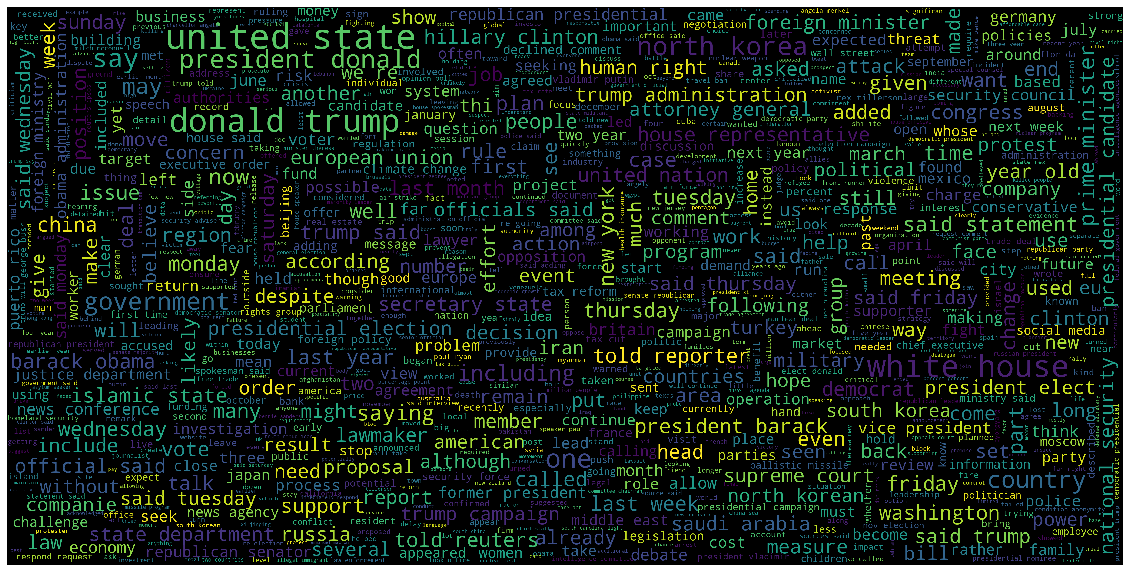

(None, 'True words')

In [33]:
show_word_cloud(" ".join(combined_data[combined_data.category == 'True'].text)),'True words'

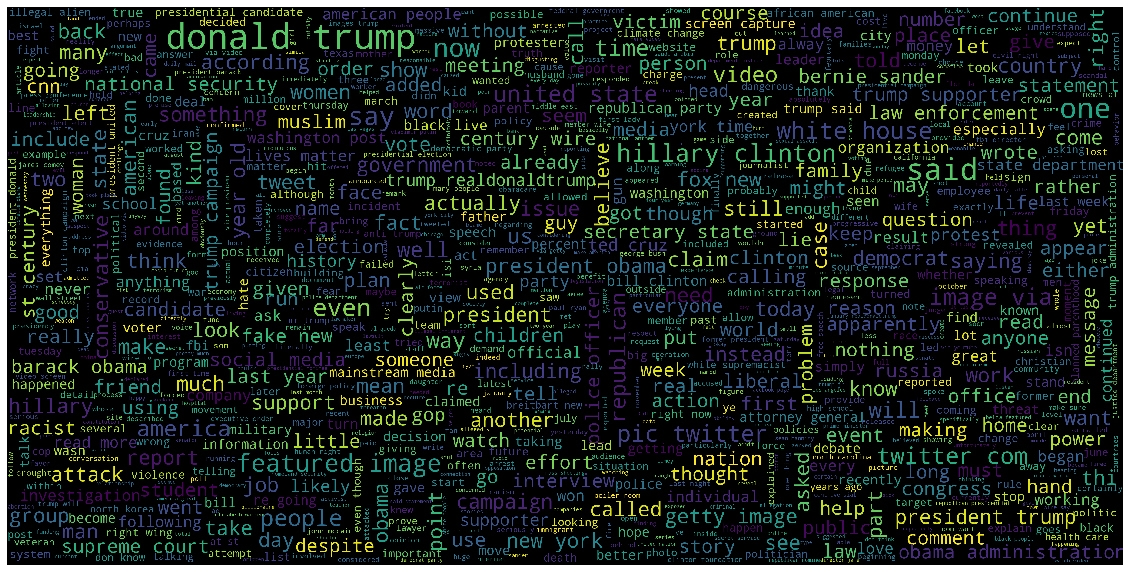

(None, 'Fake words')

In [34]:
show_word_cloud(" ".join(combined_data[combined_data.category == 'Fake'].text)),'Fake words'

# Number of words in each text

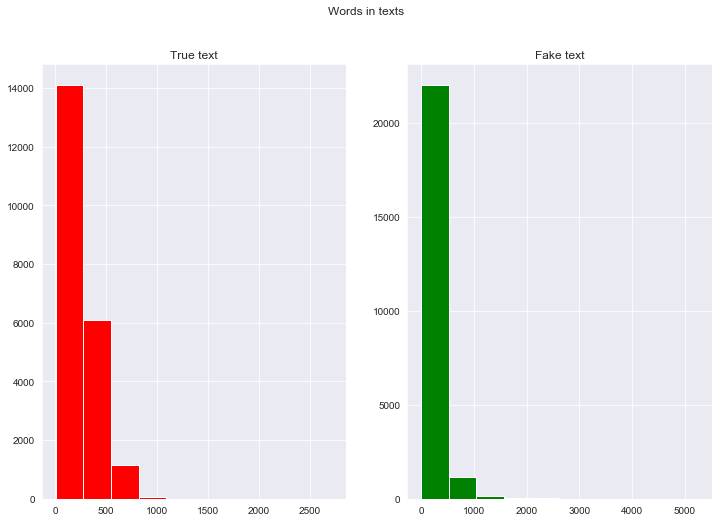

In [37]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=combined_data[combined_data['category']=='True']['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('True text')
text_len=combined_data[combined_data['category']=='Fake']['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('Fake text')
fig.suptitle('Words in texts')
plt.show()

# Lemmatization - Shorten words back to their root form and always returns a proper word that can be found in the dictionary.

In [38]:
from nltk.util import ngrams
def basic_cleaning(text):
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    words = re.sub(r'[^\w\s]', '', text).split()
    return[wnl.lemmatize(word) for word in words if word not in stopwords]

In [39]:
combined_data['text'].apply(basic_cleaning)

0        [head, conservative, republican, faction, u, c...
1        [transgender, people, allowed, first, time, en...
2        [special, counsel, investigation, link, russia...
3        [trump, campaign, adviser, george, papadopoulo...
4        [president, donald, trump, called, u, postal, ...
5        [white, house, said, friday, set, kick, talk, ...
6        [president, donald, trump, said, thursday, bel...
7        [fake, news, love, talk, called, low, approval...
8        [together, making, america, great, bit, ly, ln...
9        [alabama, secretary, state, john, merrill, sai...
10       [alabama, official, thursday, certified, democ...
11       [new, u, tax, code, target, high, tax, state, ...
12       [vanity, fair, look, last, leg, bending, backw...
13       [day, trump, inaugurated, estimated, isi, figh...
14       [man, claiming, person, delivered, gift, wrapp...
15       [lottery, drawing, settle, tied, virginia, leg...
16       [georgian, american, businessman, met, miss, u.

In [40]:
from nltk.tokenize import word_tokenize, sent_tokenize
Tw_token = word_tokenize(" ".join(combined_data[combined_data.category == 'True'].text))
Fw_token = word_tokenize(" ".join(combined_data[combined_data.category == 'Fake'].text))

In [41]:
from collections import Counter
Freq_True = Counter(Tw_token).most_common(30)
Freq_Fake = Counter(Fw_token).most_common(30)

In [42]:
def plot_most_comman_words(data,label):
    most_comman_dict = {}
    palette=''
    for x in data:
        tup = x
        most_comman_dict[tup[0]] = tup[1]
    d = pd.DataFrame({label: list(most_comman_dict.keys()),
                  'Count': list(most_comman_dict.values())})
    if label=='True words':
        palette='plasma_r'
    else:
        palette='rocket'
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=d, x= "Count", y = label,palette=palette)
    ax.set(ylabel = label)
    plt.show()


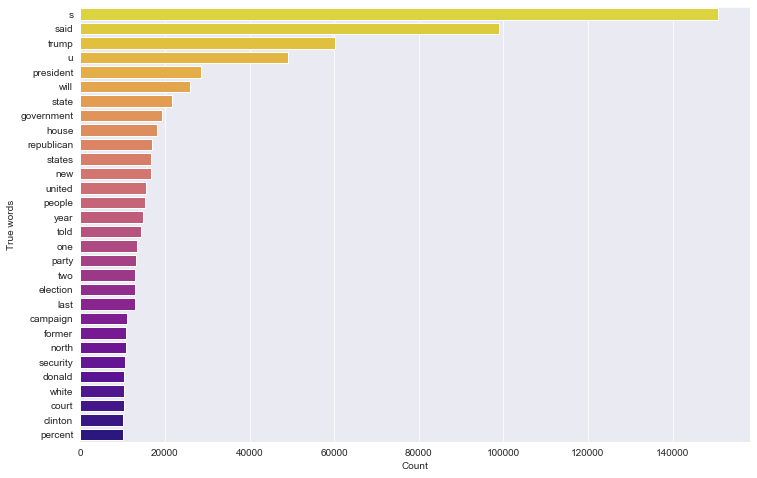

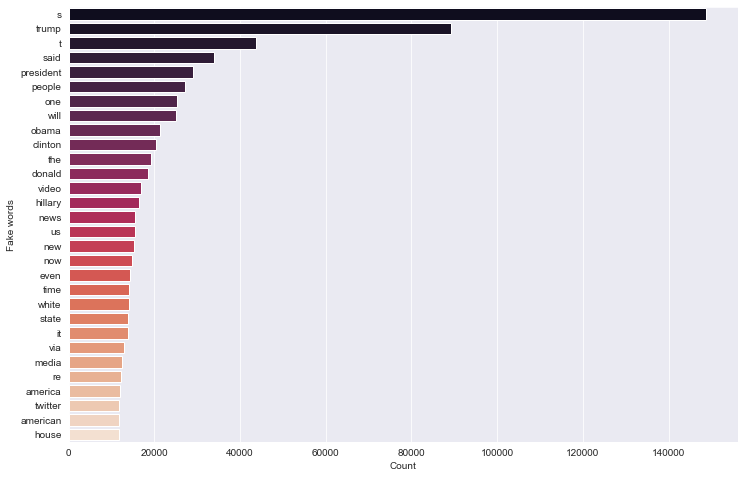

In [43]:
plot_most_comman_words(Freq_True,'True words')
plot_most_comman_words(Freq_Fake,'Fake words')

# Ngram - True word Analysis

In [44]:
True_words = basic_cleaning(''.join(str(combined_data[combined_data['category']=='True']['text'].tolist())))

In [45]:
# N-gram for Truenews
True_words_bigrams_series = (pd.Series(nltk.ngrams(True_words, 2)).value_counts())[:20]

Text(0.5, 0, '# of Occurances')

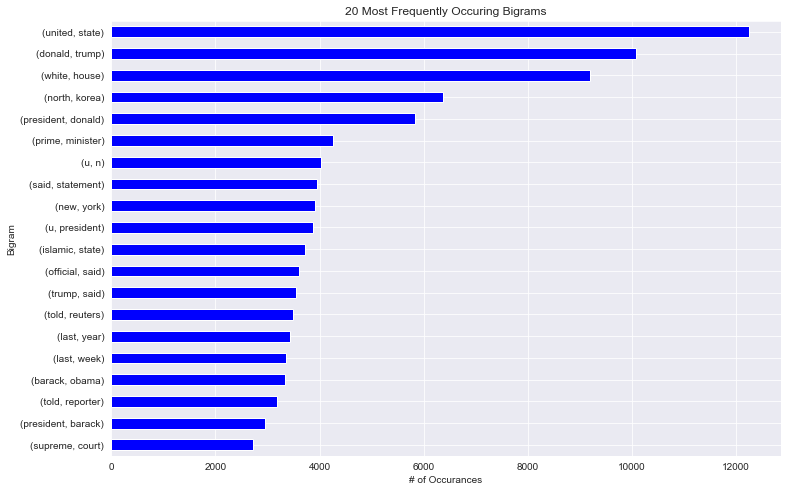

In [46]:
# Truenews - Bigram
True_words_bigrams_series.sort_values().plot.barh(color='blue', width=.5, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

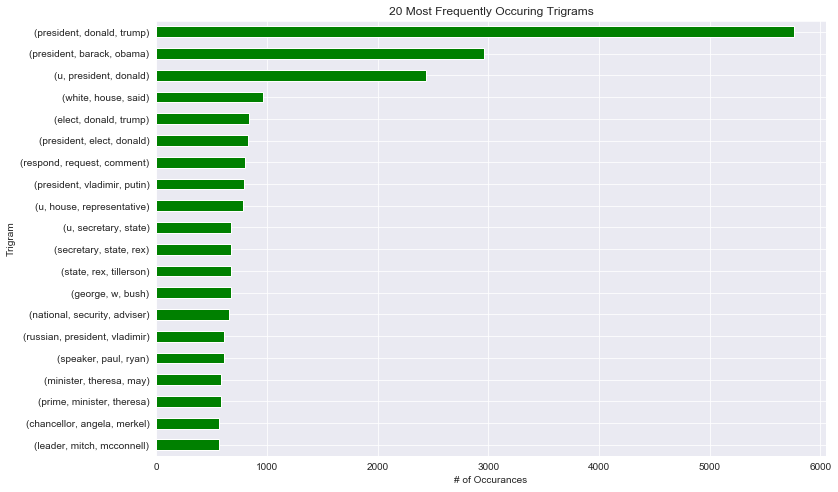

In [47]:
# Truenews - Trigram
True_words_trigrams_series = (pd.Series(nltk.ngrams(True_words, 3)).value_counts())[:20]
True_words_trigrams_series.sort_values().plot.barh(color='green', width=.5, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

# N-Gram - Fake word Analysis

In [48]:
Fake_words = basic_cleaning(''.join(str(combined_data[combined_data['category']=='Fake']['text'].tolist())))

In [49]:
# N gram - Fake news
Fake_words_bigrams_series = (pd.Series(nltk.ngrams(Fake_words, 2)).value_counts())[:20]

Text(0.5, 0, '# of Occurances')

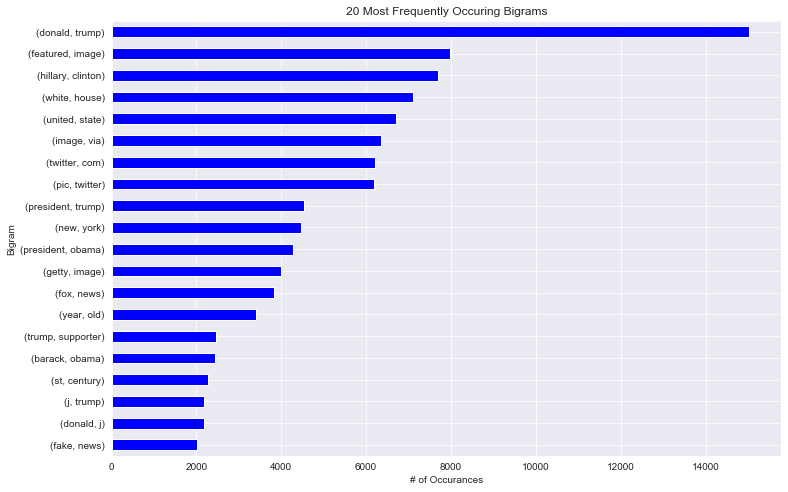

In [50]:
#Bigram for Fake news
Fake_words_bigrams_series.sort_values().plot.barh(color='blue', width=.5, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

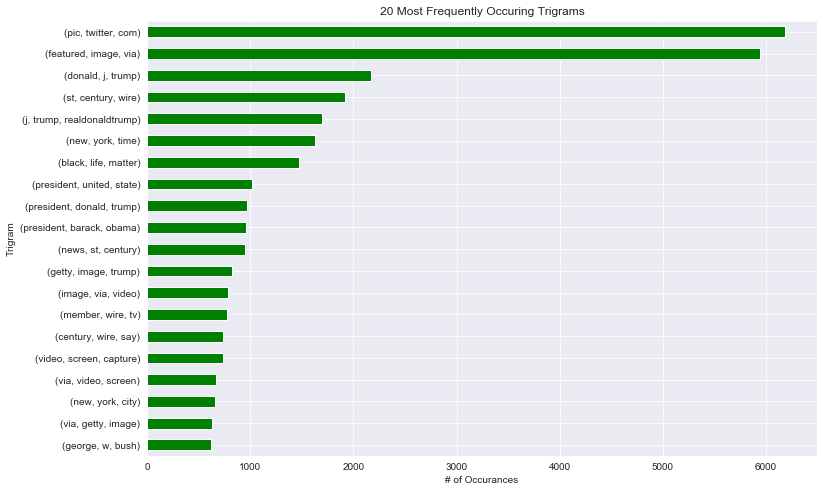

In [51]:
# Trigram for fake news
Fake_words_trigrams_series = (pd.Series(nltk.ngrams(Fake_words, 3)).value_counts())[:20]
Fake_words_trigrams_series.sort_values().plot.barh(color='green', width=.5, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

# Split the data into Testing and Training

In [52]:
# Split the data into X and Y
X = combined_data.text
Y = combined_data.category

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=53)

In [54]:
# Extracting features from text
from sklearn.feature_extraction.text import CountVectorizer
# Fit the CountVectorizer to the training data
count_vec = CountVectorizer(stop_words='english')
X_train_counts = count_vec.fit_transform(X_train)
X_train_counts.shape

(30081, 95079)

In [55]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(30081, 95079)

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer(stop_words='english',max_df=0.7)

# Multinomial Naive Bayes

In [57]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())])

model = pipeline.fit(X_train, y_train) # fitting the model
prediction = model.predict(X_test) # Predictions
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 93.71%


In [58]:
from sklearn.metrics import classification_report
# Print a classification report  - Metrics
print(f"Classification Report: \n {classification_report(y_test,prediction)}")

print(f"\n Confusion matrix: \n {confusion_matrix(y_test,prediction)}")

#overa all accuracy 
print(f"\n Over all Accuracy of the Model: \n {accuracy_score(y_test,prediction)}")

Classification Report: 
               precision    recall  f1-score   support

        Fake       0.92      0.96      0.94      7639
        True       0.95      0.92      0.93      7178

    accuracy                           0.94     14817
   macro avg       0.94      0.94      0.94     14817
weighted avg       0.94      0.94      0.94     14817


 Confusion matrix: 
 [[7307  332]
 [ 600 6578]]

 Over all Accuracy of the Model: 
 0.9370992778565161


In [59]:
cm = confusion_matrix(y_test,prediction)
cm = pd.DataFrame(cm, index = ['Fake', 'True'], columns = ['Fake', 'True'])
cm

,Fake,True
Fake,7307,332
True,600,6578


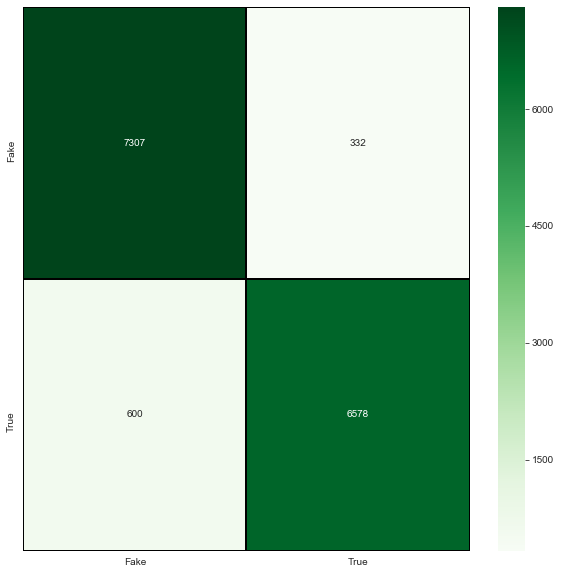

In [60]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Greens", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','True'] , yticklabels = ['Fake','True'])

# SUPPORT VECTOR MACHINE

In [61]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', LinearSVC())])
model = pipeline.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.19%


In [62]:
# Print a classification report
print(f"Classification Report: \n {classification_report(y_test,prediction)}")

print(f"\n Confusion matrix: \n {confusion_matrix(y_test,prediction)}")

#overa all accuracy 
print(f"\n Over all Accuracy of the Model: \n {accuracy_score(y_test,prediction)}")

Classification Report: 
               precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      7639
        True       0.99      0.99      0.99      7178

    accuracy                           0.99     14817
   macro avg       0.99      0.99      0.99     14817
weighted avg       0.99      0.99      0.99     14817


 Confusion matrix: 
 [[7582   57]
 [  63 7115]]

 Over all Accuracy of the Model: 
 0.9919011945738003


In [63]:
cm = confusion_matrix(y_test,prediction)
cm = pd.DataFrame(cm , index = ['Fake','True'] , columns = ['Fake','True'])
cm

,Fake,True
Fake,7582,57
True,63,7115


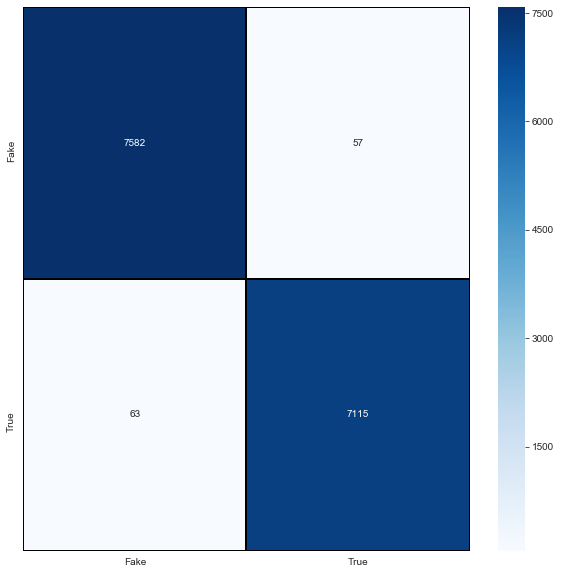

In [64]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','True'] , yticklabels = ['Fake','True'])

# Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', LogisticRegression())])
model = pipeline.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

C:\Users\bhavani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy: 98.47%


In [66]:
# Print a classification report
print(f"Classification Report: \n {classification_report(y_test,prediction)}")

print(f"\n Confusion matrix: \n {confusion_matrix(y_test,prediction)}")

#overa all accuracy 
print(f"\n Over all Accuracy of the Model: \n {accuracy_score(y_test,prediction)}")

Classification Report: 
               precision    recall  f1-score   support

        Fake       0.99      0.98      0.99      7639
        True       0.98      0.99      0.98      7178

    accuracy                           0.98     14817
   macro avg       0.98      0.98      0.98     14817
weighted avg       0.98      0.98      0.98     14817


 Confusion matrix: 
 [[7515  124]
 [ 102 7076]]

 Over all Accuracy of the Model: 
 0.9847472497806573


In [67]:
cm = confusion_matrix(y_test,prediction)
cm = pd.DataFrame(cm , index = ['Fake','True'] , columns = ['Fake','True'])
cm

,Fake,True
Fake,7515,124
True,102,7076


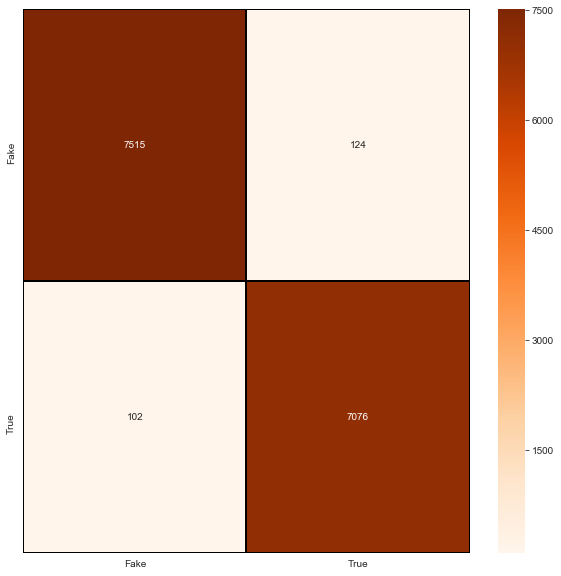

In [68]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Oranges", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','True'] , yticklabels = ['Fake','True'])